In [6]:
!pip install openmeteo-requests
!pip install requests-cache retry-requests numpy pandas

In [3]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
import numpy as np


# Setup the Open-Meteo API client with cache and retry on error

In [4]:
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)



# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below

In [5]:
url = "https://historical-forecast-api.open-meteo.com/v1/forecast"
params = {
	"latitude": 40.7128,
	"longitude": -74.006,
	"start_date": "2022-01-01",
	"end_date": "2025-05-01",
	"hourly": ["temperature_2m", "relative_humidity_2m", "precipitation"]
}
responses = openmeteo.weather_api(url, params=params)


# Process first location. Add a for-loop for multiple locations or weather models

In [6]:
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()}{response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

Coordinates 40.71033477783203°N -73.99308776855469°E
Elevation 32.0 m asl
Timezone NoneNone
Timezone difference to GMT+0 0 s


# Process hourly data. The order of variables needs to be the same as requested.

In [31]:
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_relative_humidity_2m = hourly.Variables(1).ValuesAsNumpy()
hourly_precipitation = hourly.Variables(2).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}

hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["relative_humidity_2m"] = hourly_relative_humidity_2m
hourly_data["precipitation"] = hourly_precipitation

hourly_dataframe = pd.DataFrame(data = hourly_data)
print(hourly_dataframe)


                           date  temperature_2m  relative_humidity_2m  \
0     2022-01-01 00:00:00+00:00        9.631001                  94.0   
1     2022-01-01 01:00:00+00:00        9.631001                  92.0   
2     2022-01-01 02:00:00+00:00        9.581000                  96.0   
3     2022-01-01 03:00:00+00:00        9.881001                  95.0   
4     2022-01-01 04:00:00+00:00        9.831000                  94.0   
...                         ...             ...                   ...   
29203 2025-05-01 19:00:00+00:00       19.580999                  29.0   
29204 2025-05-01 20:00:00+00:00       17.830999                  38.0   
29205 2025-05-01 21:00:00+00:00       16.830999                  48.0   
29206 2025-05-01 22:00:00+00:00       16.830999                  48.0   
29207 2025-05-01 23:00:00+00:00       15.581000                  49.0   

       precipitation  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4       

# convert to csv

In [29]:
file_path=r"C:\Users\ekambi\Downloads"
file_path

'C:\\Users\\ekambi\\Downloads'

In [32]:
hourly_dataframe.to_csv('file_path',index=False)
hourly_dataframe

,date,temperature_2m,relative_humidity_2m,precipitation
0,2022-01-01 00:00:00+00:00,9.631001,94.0,0.0
1,2022-01-01 01:00:00+00:00,9.631001,92.0,0.0
2,2022-01-01 02:00:00+00:00,9.581000,96.0,0.0
3,2022-01-01 03:00:00+00:00,9.881001,95.0,0.0
4,2022-01-01 04:00:00+00:00,9.831000,94.0,0.0
...,...,...,...,...
29203,2025-05-01 19:00:00+00:00,19.580999,29.0,0.0
29204,2025-05-01 20:00:00+00:00,17.830999,38.0,0.0
29205,2025-05-01 21:00:00+00:00,16.830999,48.0,0.0
29206,2025-05-01 22:00:00+00:00,16.830999,48.0,0.0


In [33]:
hourly_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29208 entries, 0 to 29207
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   date                  29208 non-null  datetime64[ns, UTC]
 1   temperature_2m        29208 non-null  float32            
 2   relative_humidity_2m  29208 non-null  float32            
 3   precipitation         29208 non-null  float32            
dtypes: datetime64[ns, UTC](1), float32(3)
memory usage: 570.6 KB


In [34]:
hourly_dataframe.value_counts()

date                       temperature_2m  relative_humidity_2m  precipitation
2022-01-01 00:00:00+00:00   9.631001       94.0                  0.0              1
2024-03-22 17:00:00+00:00   4.931000       32.0                  0.0              1
2024-03-22 15:00:00+00:00   2.981000       37.0                  0.0              1
2024-03-22 14:00:00+00:00   1.581000       37.0                  0.0              1
2024-03-22 13:00:00+00:00  -0.169000       43.0                  0.0              1
                                                                                 ..
2023-02-10 12:00:00+00:00   12.731000      76.0                  0.0              1
2023-02-10 11:00:00+00:00   11.831000      79.0                  0.0              1
2023-02-10 10:00:00+00:00   10.281000      88.0                  0.0              1
2023-02-10 09:00:00+00:00   10.581000      80.0                  0.0              1
2025-05-01 23:00:00+00:00   15.581000      49.0                  0.0             

In [35]:
hourly_dataframe.describe()

,temperature_2m,relative_humidity_2m,precipitation
count,29208.000000,29208.000000,29208.000000
mean,12.798384,63.208778,0.103759
std,9.771200,20.128769,1.273509
min,-15.769000,10.000000,0.000000
25%,5.131000,47.000000,0.000000
50%,12.381001,62.000000,0.000000
75%,20.980999,80.000000,0.000000
max,36.731003,100.000000,100.400002


In [36]:
hourly_dataframe.corr()

,date,temperature_2m,relative_humidity_2m,precipitation
date,1.000000,-0.036046,-0.038491,-0.009179
temperature_2m,-0.036046,1.000000,0.007945,-0.001833
relative_humidity_2m,-0.038491,0.007945,1.000000,0.113080
precipitation,-0.009179,-0.001833,0.113080,1.000000


In [37]:
sns.set(style="whitegrid")

# temperature over time

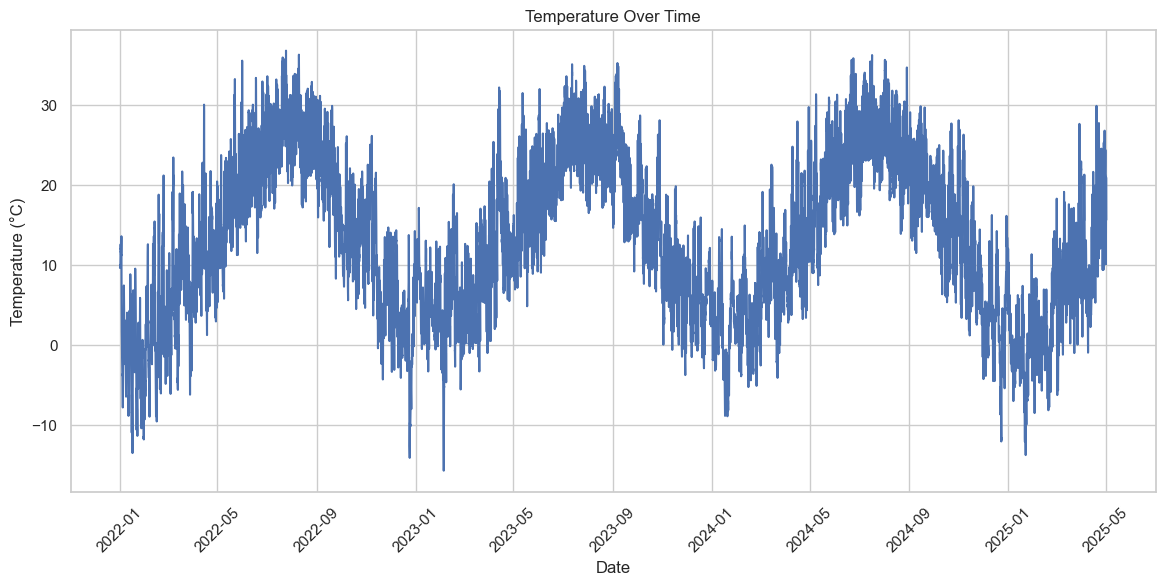

In [38]:

plt.figure(figsize=(14,6))
sns.lineplot(x='date', y='temperature_2m', data=hourly_dataframe)
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

# humidity over time

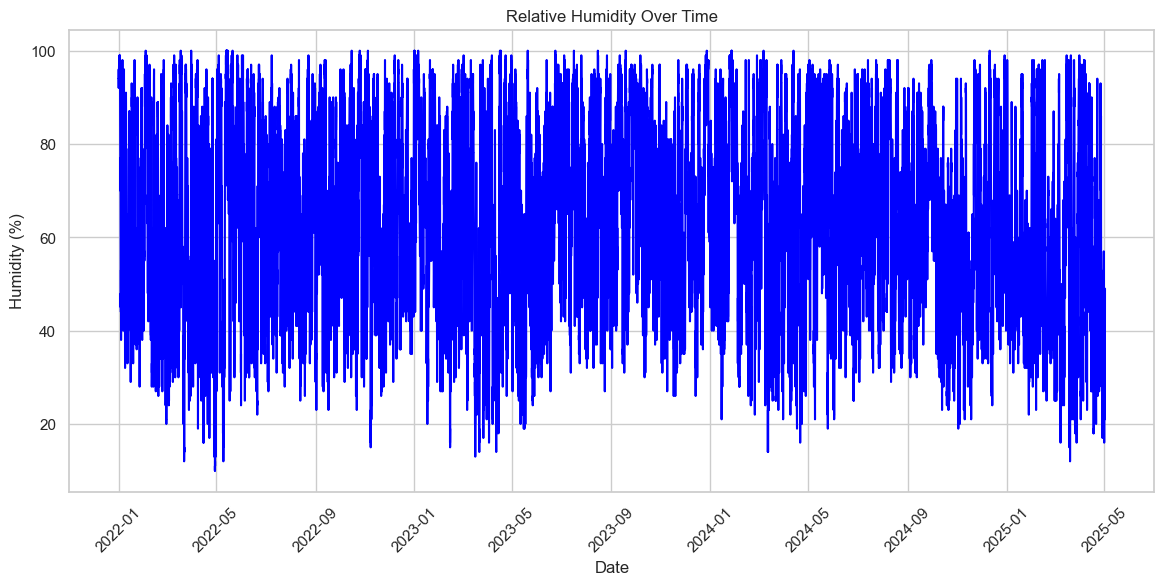

In [15]:

plt.figure(figsize=(14,6))
sns.lineplot(x='date', y='relative_humidity_2m', data=hourly_dataframe, color="blue")
plt.title('Relative Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.xticks(rotation=45)
plt.show()

# precipitation over time

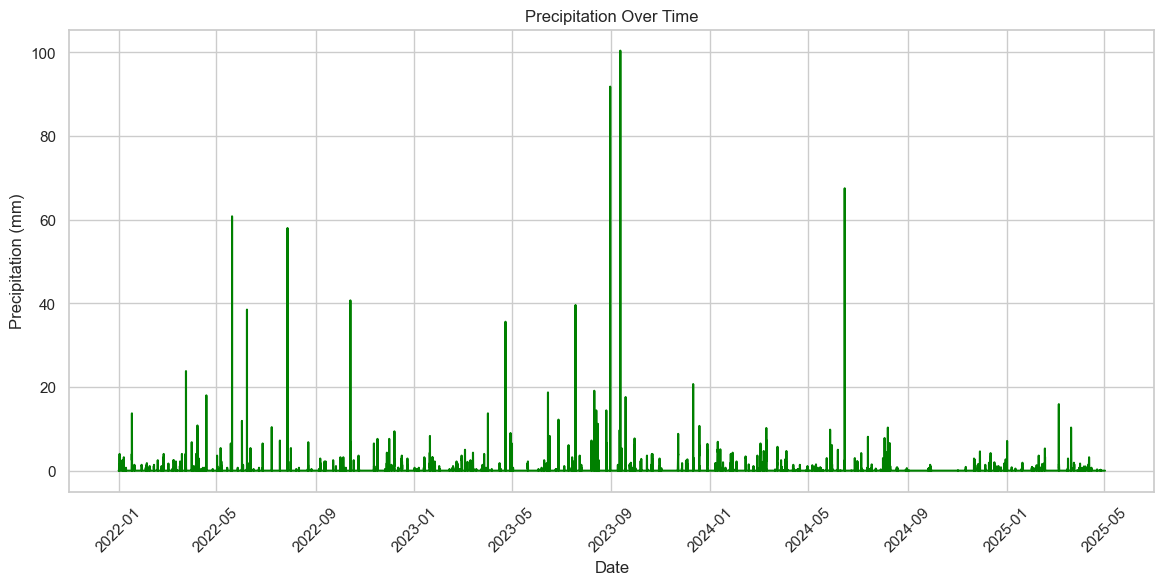

In [16]:

plt.figure(figsize=(14,6))
sns.lineplot(x='date', y='precipitation', data=hourly_dataframe, color="green")
plt.title('Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.xticks(rotation=45)
plt.show()

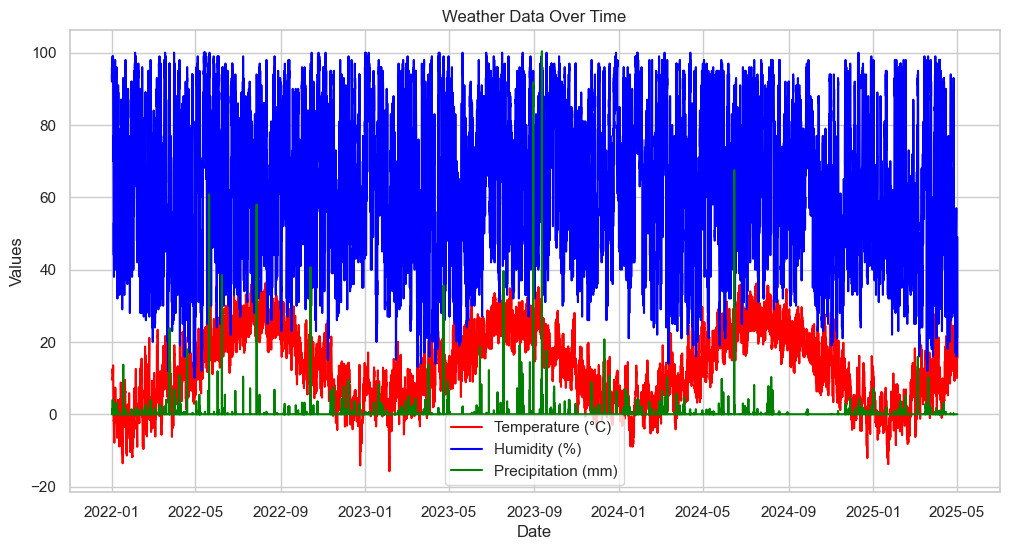

In [17]:
hourly_dataframe.set_index('date', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(hourly_dataframe.index, hourly_dataframe["temperature_2m"], label="Temperature (°C)", color='red')
plt.plot(hourly_dataframe.index, hourly_dataframe["relative_humidity_2m"], label="Humidity (%)", color='blue')
plt.plot(hourly_dataframe.index, hourly_dataframe["precipitation"], label="Precipitation (mm)", color='green')
plt.xlabel("Date")
plt.ylabel("Values")
plt.title("Weather Data Over Time")
plt.legend()
plt.grid(True)
plt.show()

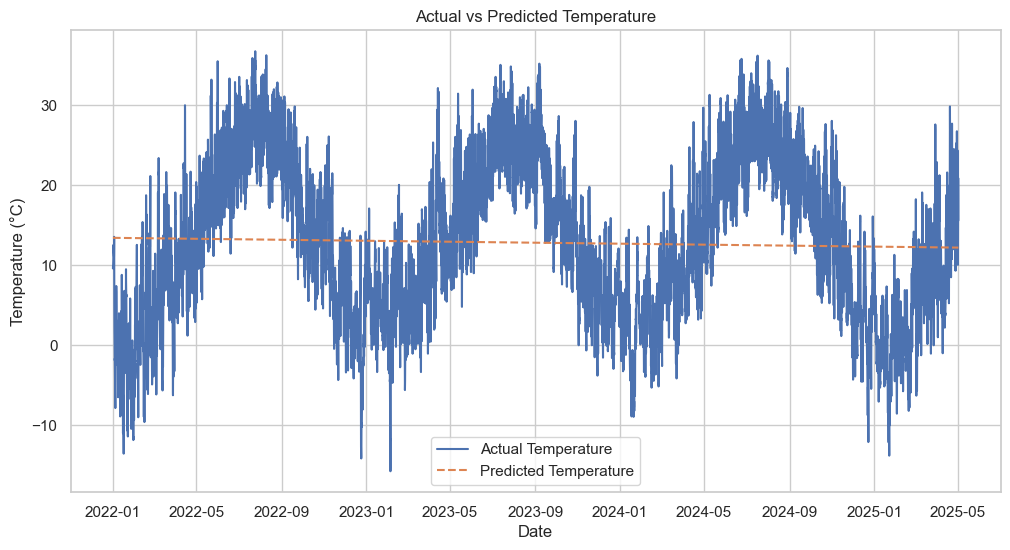

In [18]:
hourly_dataframe['time_index'] = np.arange(len(hourly_dataframe))

X = hourly_dataframe[['time_index']]
y = hourly_dataframe['temperature_2m']

model = LinearRegression()
model.fit(X, y)

hourly_dataframe['temp_prediction'] = model.predict(X)

plt.figure(figsize=(12, 6))
plt.plot(hourly_dataframe.index, hourly_dataframe['temperature_2m'], label="Actual Temperature")
plt.plot(hourly_dataframe.index, hourly_dataframe['temp_prediction'], label="Predicted Temperature", linestyle='--')
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Actual vs Predicted Temperature")
plt.legend()
plt.show()


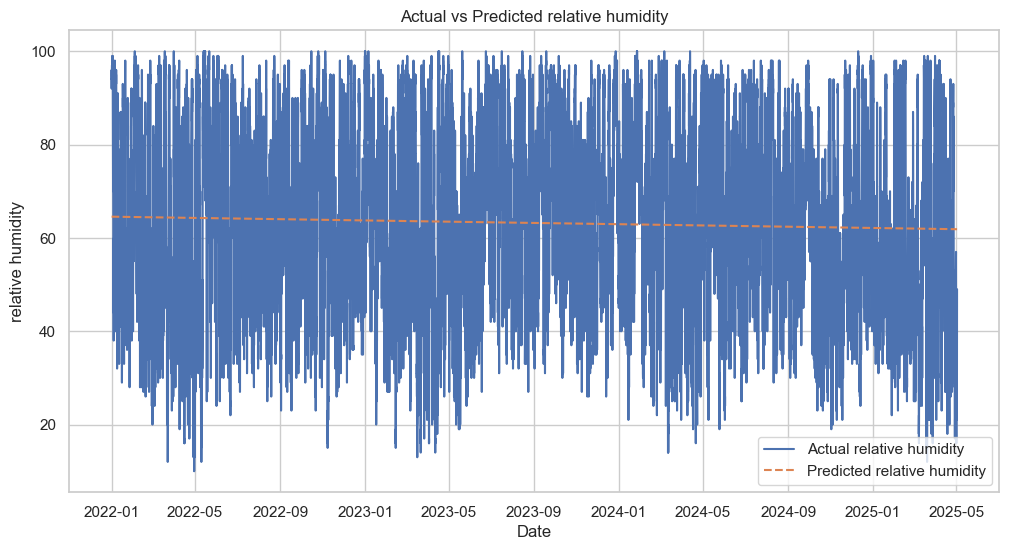

In [22]:
hourly_dataframe['time_index'] = np.arange(len(hourly_dataframe))

X = hourly_dataframe[['time_index']]
y = hourly_dataframe['relative_humidity_2m']

model = LinearRegression()
model.fit(X, y)

hourly_dataframe['humidity_prediction'] = model.predict(X)

plt.figure(figsize=(12, 6))
plt.plot(hourly_dataframe.index, hourly_dataframe['relative_humidity_2m'], label="Actual relative humidity")
plt.plot(hourly_dataframe.index, hourly_dataframe['humidity_prediction'], label="Predicted relative humidity", linestyle='--')
plt.xlabel("Date")
plt.ylabel("relative humidity")
plt.title("Actual vs Predicted relative humidity")
plt.legend()
plt.show()


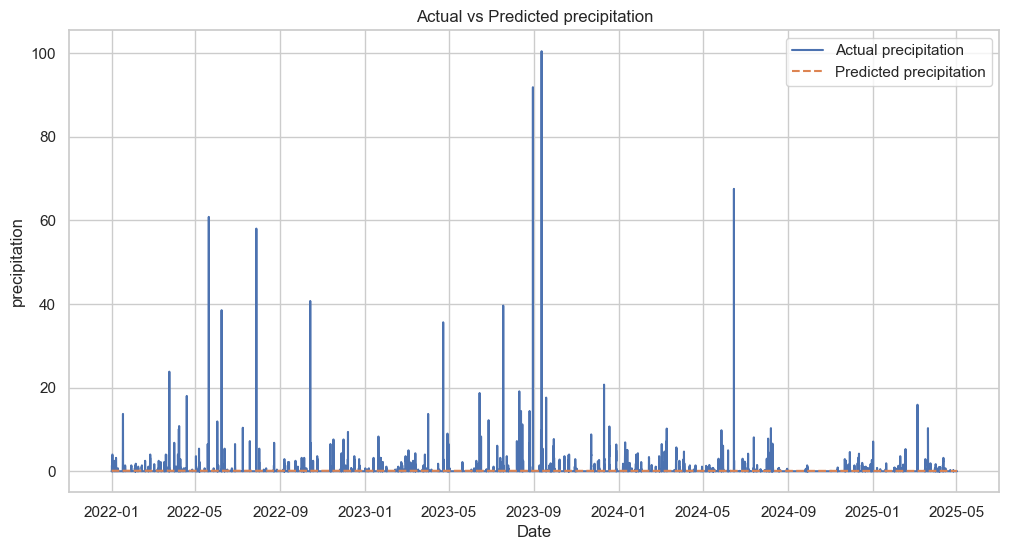

In [25]:
hourly_dataframe['time_index'] = np.arange(len(hourly_dataframe))

X = hourly_dataframe[['time_index']]
y = hourly_dataframe['precipitation']

model = LinearRegression()
model.fit(X, y)

hourly_dataframe['precipitation_prediction'] = model.predict(X)

plt.figure(figsize=(12, 6))
plt.plot(hourly_dataframe.index, hourly_dataframe['precipitation'], label="Actual precipitation")
plt.plot(hourly_dataframe.index, hourly_dataframe['precipitation_prediction'], label="Predicted precipitation", linestyle='--')
plt.xlabel("Date")
plt.ylabel("precipitation")
plt.title("Actual vs Predicted precipitation")
plt.legend()
plt.show()


In [28]:
hourly_dataframe

,temperature_2m,relative_humidity_2m,precipitation,time_index,temp_prediction,humidity_prediction,precipitation_prediction
date,,,,,,,
2022-01-01 00:00:00+00:00,9.631001,94.0,0.0,0,13.408399,64.550675,0.124002
2022-01-01 01:00:00+00:00,9.631001,92.0,0.0,1,13.408357,64.550584,0.124000
2022-01-01 02:00:00+00:00,9.581000,96.0,0.0,2,13.408316,64.550492,0.123999
2022-01-01 03:00:00+00:00,9.881001,95.0,0.0,3,13.408274,64.550400,0.123997
2022-01-01 04:00:00+00:00,9.831000,94.0,0.0,4,13.408232,64.550308,0.123996
...,...,...,...,...,...,...,...
2025-05-01 19:00:00+00:00,19.580999,29.0,0.0,29203,12.188535,61.867249,0.083523
2025-05-01 20:00:00+00:00,17.830999,38.0,0.0,29204,12.188494,61.867157,0.083521
2025-05-01 21:00:00+00:00,16.830999,48.0,0.0,29205,12.188452,61.867065,0.083520
